In [6]:
import numpy as np
import pandas as pd
data = pd.read_excel('3span-beams-ROT.xlsx')
print(data.shape)
data=data.dropna()
print(data.shape)

(64583, 69)
(64582, 69)


In [7]:
data.iloc[1]

P1            178
P2            356
P3             89
LPf       7.45075
L1              1
          ...    
r56    0.00864886
r57    0.00949313
r58     0.0100962
r59      0.010458
r60     0.0105786
Name: 1, Length: 69, dtype: object

In [8]:
shape=data.shape
N=shape[0]


inp=np.zeros((N,7,1))
LPF = np.zeros((N,1))
Y = np.zeros((N,31))

for ii in range(0,N):
    
    P1= int(data.iloc[ii,0])
    P2= int(data.iloc[ii,1])
    P3= int(data.iloc[ii,2])
    
    L1= int(data.iloc[ii,4])
    L2= int(data.iloc[ii,5])
    L3= int(data.iloc[ii,6])
    
    inp[ii,0,0] = (P1*data.iloc[ii][3]+P1*0.001)*0.01
    inp[ii,1,0] = (P2*data.iloc[ii][3]+P2*0.001)*0.01
    inp[ii,2,0] = (P3*data.iloc[ii][3]+P3*0.001)*0.01
    
    inp[ii,3,0] = L1
    inp[ii,4,0] = L2
    inp[ii,5,0] = L3
    
    LPF[ii,0]= data.iloc[ii][3]
    
    pos = data.iloc[ii,7]
    if pos=="meio":
        inp[ii,6,0] = 0
    elif pos=="ponta":
        inp[ii,6,0] = 1


    
    
    Y[ii,:] = data.iloc[ii][[8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68]]


    




In [9]:
for i in range(10):
    print(inp[i,:,0])

[3.91624049 1.95812025 1.95812025 7.         7.         8.
 1.        ]
[13.26411902 26.52823804  6.63205951  1.          5.          5.
  0.        ]
[10.18642105  5.09321053 20.37284211  6.          6.          9.
  0.        ]
[ 3.72013168  3.72013168  3.72013168 10.          1.          7.
  0.        ]
[5.04497075 2.47489131 5.04497075 4.         4.         7.
 0.        ]
[ 6.97095519 13.94191039  6.97095519  9.          7.          3.
  1.        ]
[ 3.61877348  3.61877348  7.23754696  5.         10.          4.
  0.        ]
[4.29369805 2.14684902 8.58739609 4.         9.         8.
 0.        ]
[5.60708485 5.60708485 5.60708485 8.         1.         4.
 0.        ]
[10.18166924 10.18166924 20.36333849  5.          6.          6.
  0.        ]


Train on 64582 samples, validate on 64582 samples
Epoch 1/20
64582/64582 [==============================] - 8s 130us/step - loss: 0.0016 - val_loss: 0.0012
Epoch 2/20
64582/64582 [==============================] - 6s 98us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/20
64582/64582 [==============================] - 6s 100us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/20
64582/64582 [==============================] - 6s 98us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/20
64582/64582 [==============================] - 8s 119us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 6/20
64582/64582 [==============================] - 7s 112us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/20
64582/64582 [==============================] - 7s 109us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/20
64582/64582 [==============================] - 7s 109us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/20
64582/64582 [==============================] - 7s 109us/step - loss: 0.0011 - val_loss: 0.001

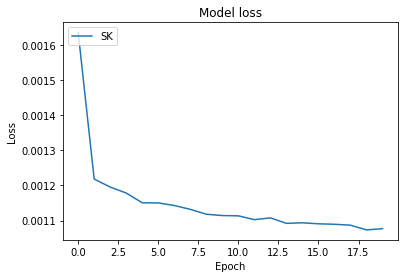

In [15]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

inputA = krs.Input(shape=(7,))

z = Dense(512, activation="relu")(inputA)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(64, activation="relu")(z)
z = Dense(32, activation="relu")(z)
z = Dense(31, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
NN_SK_model = krs.Model(inputs=inputA, outputs=z)
NN_SK_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


NN_SK_history = NN_SK_model.fit( inp[:,:,0], Y, validation_data=(inp[:,:,0], Y),
                        epochs=20, batch_size=32, verbose=1)  
    
#NN_SK_model.save('3-spanMOM-LPF-model.h5')
plt.figure()
# Plot training & validation loss values
plt.plot(NN_SK_history.history['loss'],label = 'SK')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [16]:
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

In [17]:
  y_pred1 = NN_SK_model.predict([inp[:,:,0]])

3.0 7.0 5.0


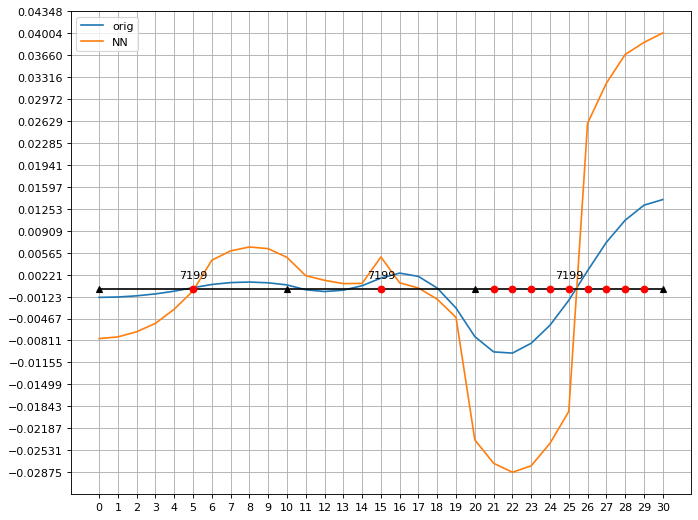

3.0 1.0 2.0


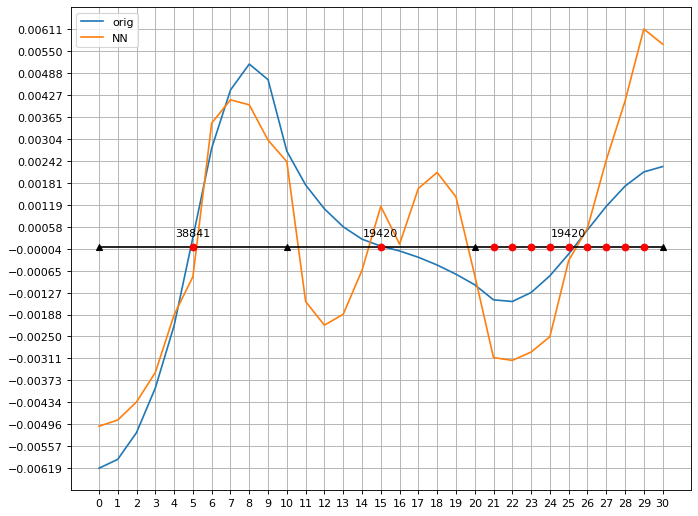

2.0 9.0 10.0


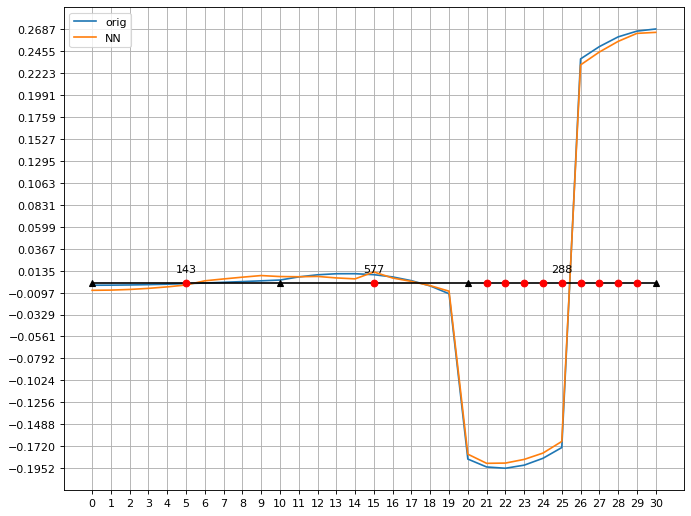

4.0 10.0 1.0


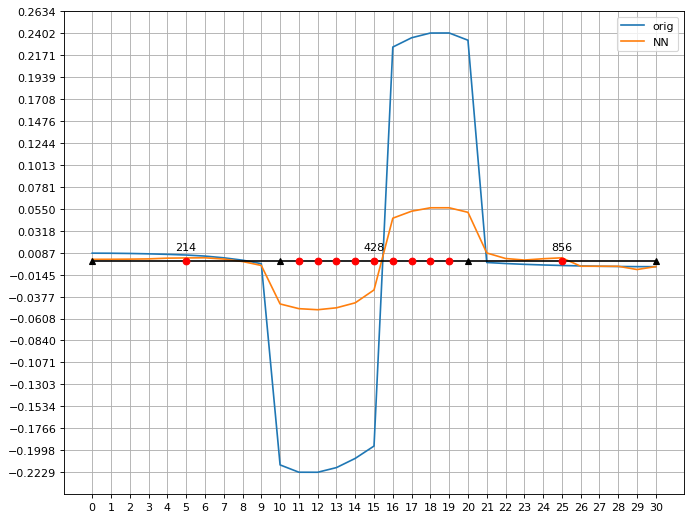

8.0 8.0 9.0


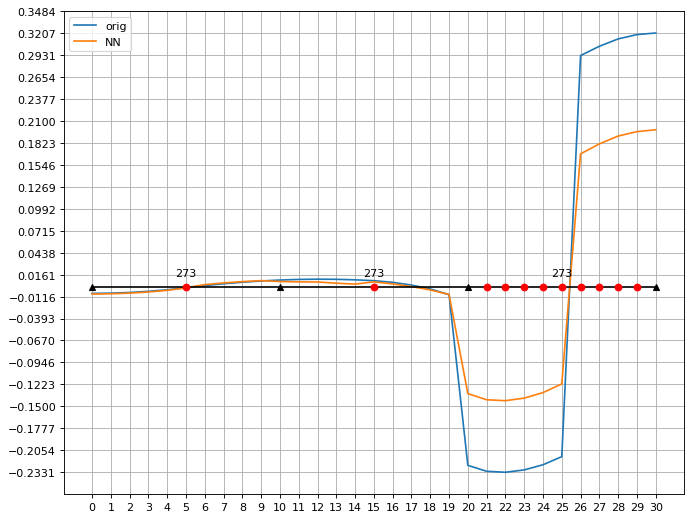

8.0 1.0 2.0


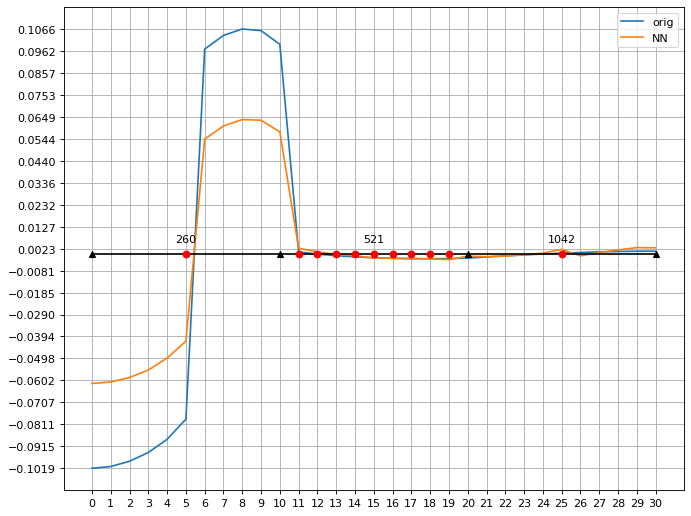

8.0 7.0 8.0


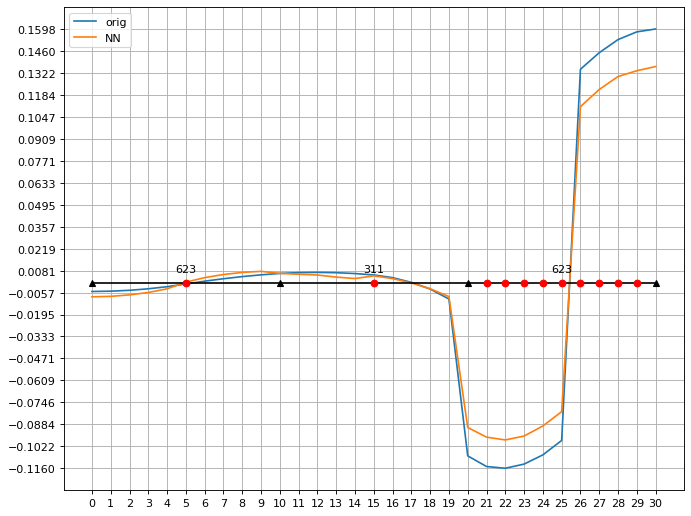

7.0 5.0 10.0


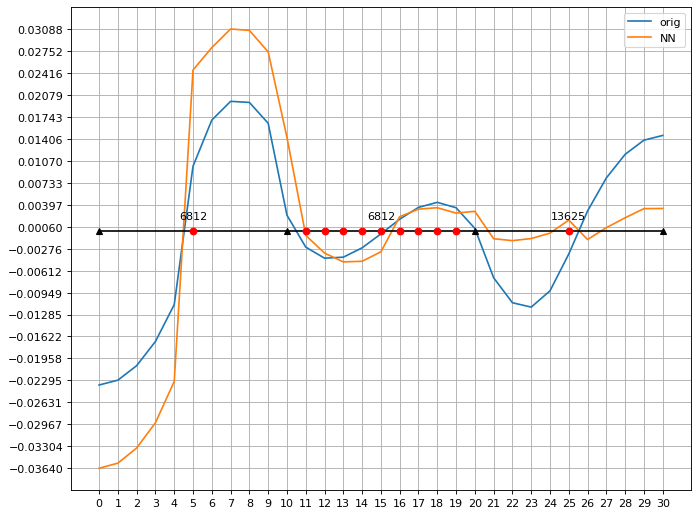

1.0 3.0 1.0


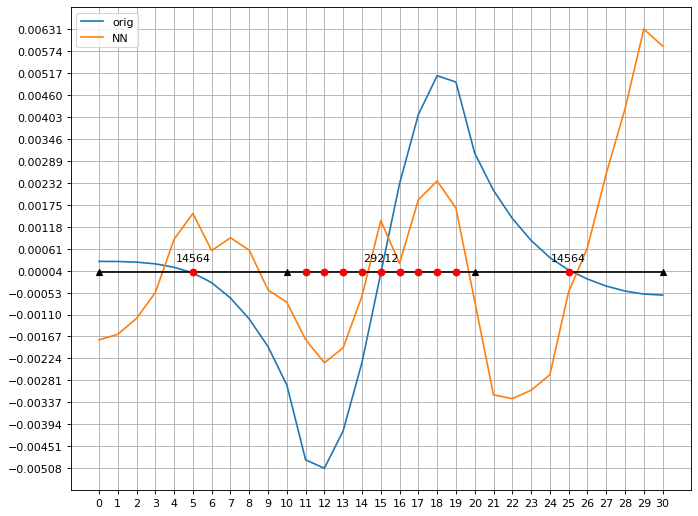

2.0 10.0 7.0


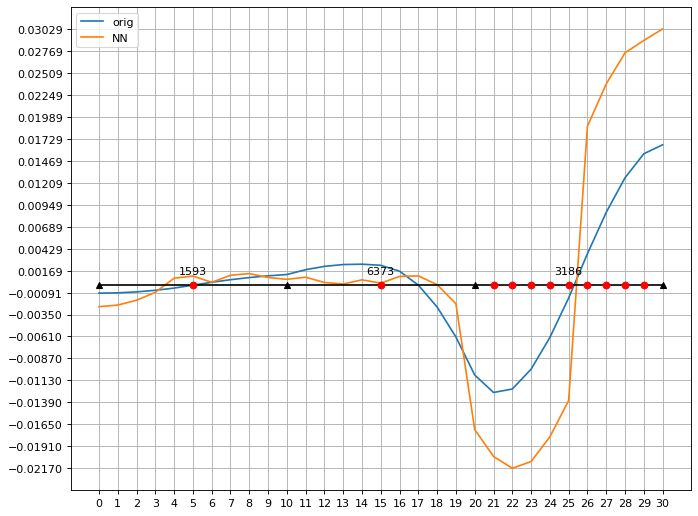

1.0 8.0 6.0


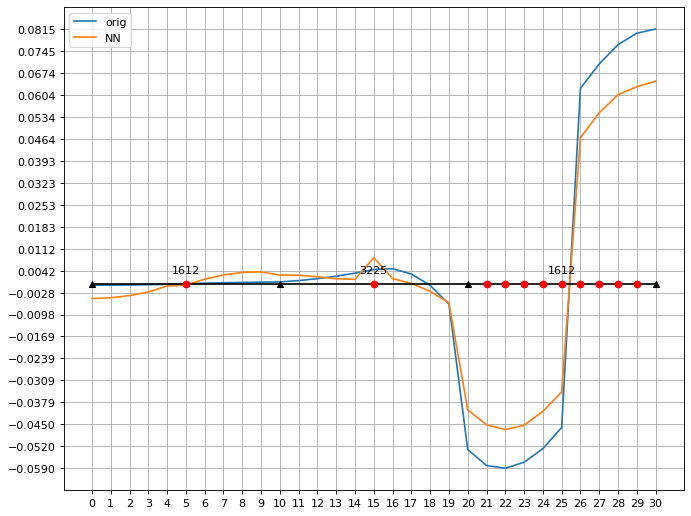

1.0 9.0 2.0


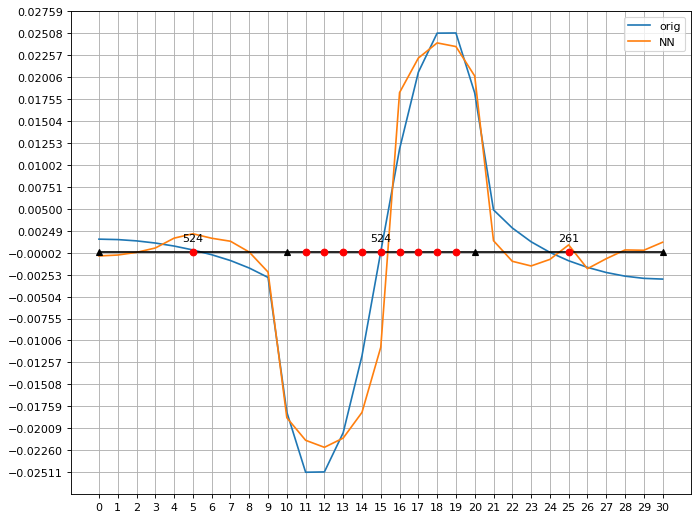

9.0 6.0 3.0


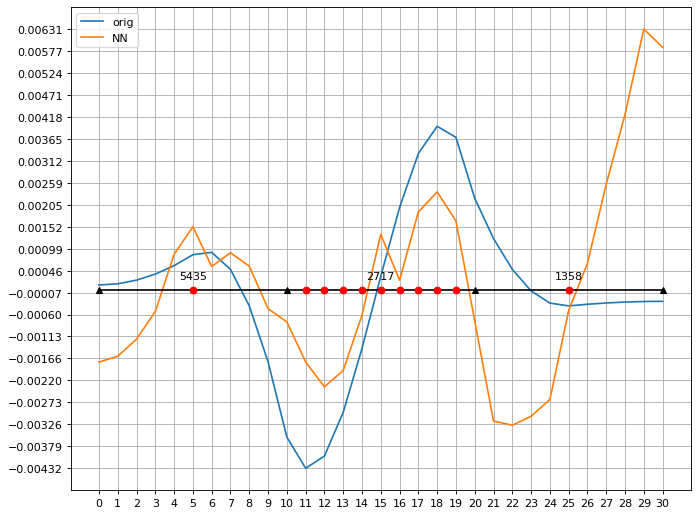

1.0 1.0 6.0


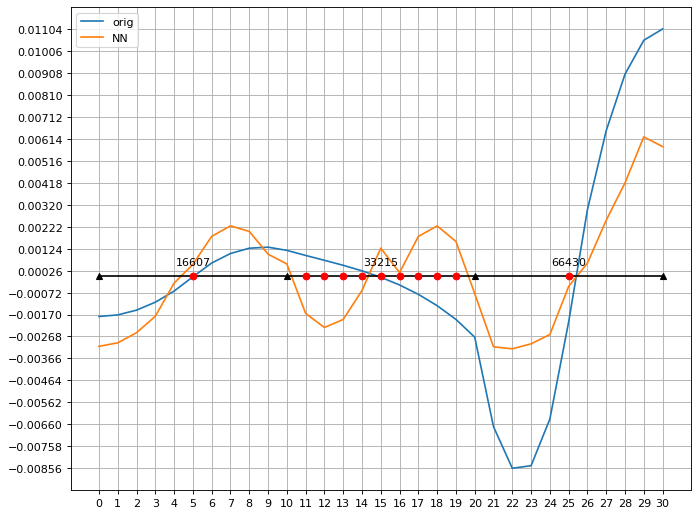

7.0 3.0 7.0


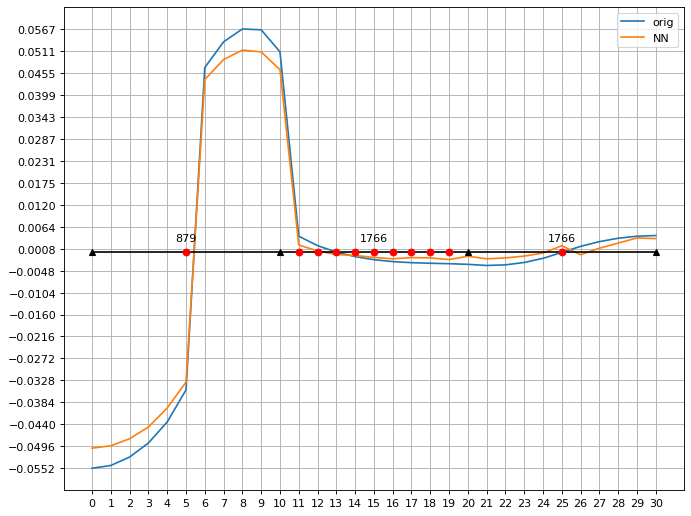

1.0 5.0 6.0


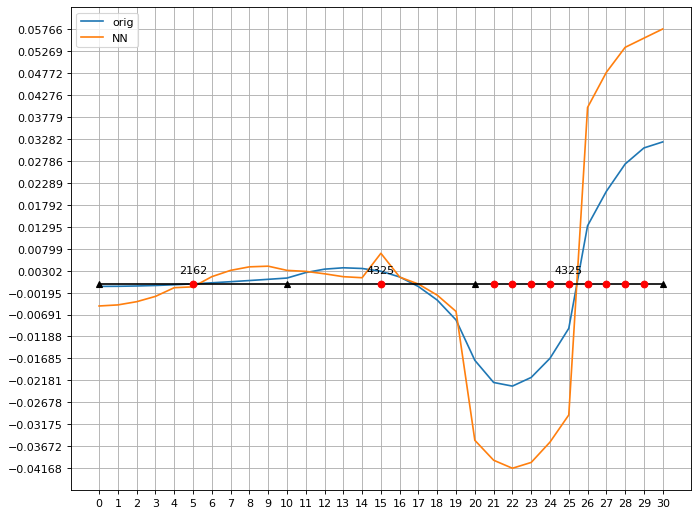

9.0 2.0 1.0


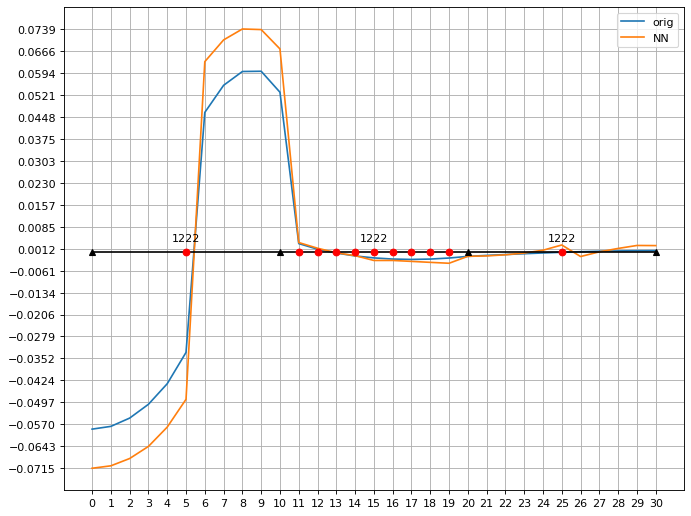

1.0 3.0 5.0


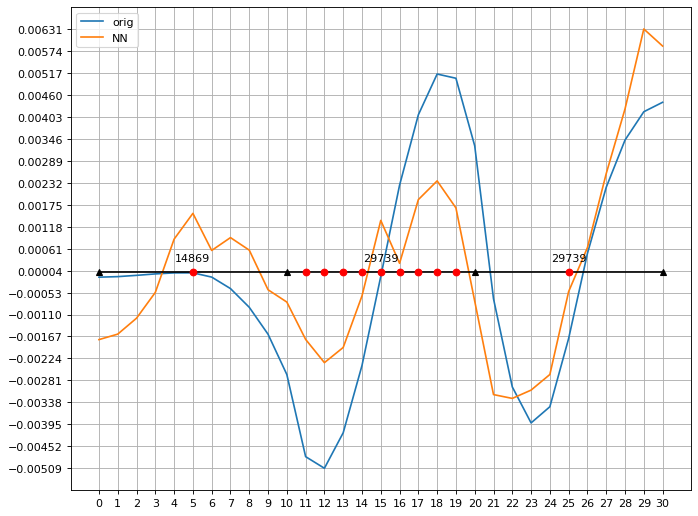

3.0 4.0 6.0


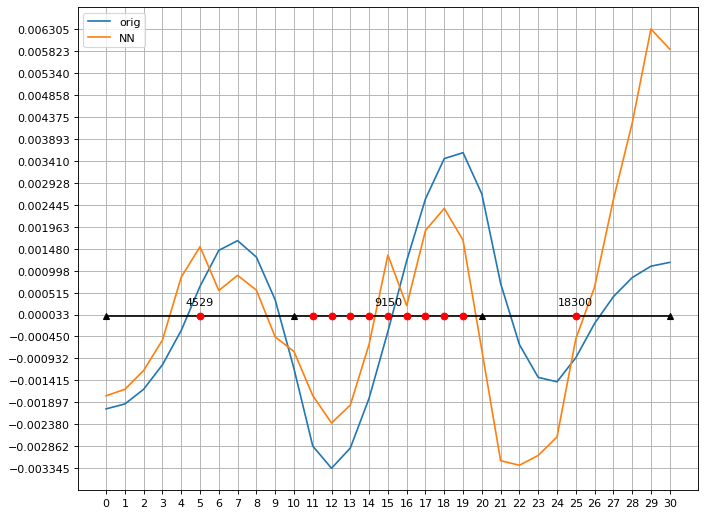

In [20]:
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
for ii in [54645,5744,7544,3343,34243,7677,42344,34345,25425,31431,15353,13545,35234,23543,56432,32144,34225,24352,2355]:
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    
  
    
    print(inp[ii,3,0],inp[ii,4,0],inp[ii,5,0])
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,10,20,30],[0,0,0,0],'^k')
    if inp[ii,6,0]:
        loads=[5,15,21,22,23,24,25,26,27,28,29]
        dots=[25,5,15]
    else:
        loads=[5,11,12,13,14,15,16,17,18,19,25]
        dots=[15,5,25]
    plt.plot(loads,[0,0,0,0,0,0,0,0,0,0,0],'ro')
    
    for i in range(3):
        plt.annotate(int(inp[ii,i,0]*100*LPF[ii,0]), # this is the text
        (dots[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center
    
        
    stepd=(maximo-minimo)/20.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()